In [15]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import unicodedata
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [16]:
df = pd.read_csv('train-3.csv')
data = df.copy()
data.head()

/var/folders/bs/x01s4n69311dylwpb3yzhx6w0000gn/T/ipykernel_12537/2869837583.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train-3.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [17]:
columnas_vacias = ~data.isna().any(axis=1)
data_limpia = data.copy()
data_limpia = data_limpia.loc[columnas_vacias].copy()
data_limpia

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [18]:
col_no_sirven = ['ID', 'Name','SSN', 'Month', 'Occupation']
data_limpia= data_limpia.drop(columns=col_no_sirven)
data_limpia

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,CUS_0xd40,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,CUS_0x21b1,28_,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,CUS_0x21b1,28,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,CUS_0x21b1,28,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,3,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,CUS_0x942c,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,25,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [19]:
data_limpia['Age'] = pd.to_numeric(data_limpia['Age'], errors='coerce')
data_limpia['Num_Bank_Accounts'] = pd.to_numeric(data_limpia['Num_Bank_Accounts'], errors='coerce')
data_limpia['Num_Credit_Card'] = pd.to_numeric(data_limpia['Num_Credit_Card'], errors='coerce')
data_limpia['Num_of_Loan'] = pd.to_numeric(data_limpia['Num_of_Loan'], errors='coerce') 

edad_min, edad_max = 18, 90
val_min,  val_max  = 1, 30

filas_a_borrar = (
    (data_limpia['Age'].lt(edad_min) | data_limpia['Age'].gt(edad_max)) |
    (data_limpia['Num_Bank_Accounts'].gt(val_max)) |
    (data_limpia['Num_Credit_Card'].gt(val_max)) |
    (data_limpia['Num_of_Loan'].gt(val_max) | data_limpia['Num_of_Loan'].lt(val_min))
)

df_limpia= data_limpia.loc[~filas_a_borrar].copy()
df_limpia


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23.0,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,CUS_0xd40,23.0,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,CUS_0x21b1,NaN,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,CUS_0x21b1,28.0,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,CUS_0x21b1,28.0,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,25.0,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,CUS_0x942c,25.0,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,25.0,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,25.0,39628.99,3359.415833,4,6,5729,2.0,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [20]:
df_limpia = df_limpia.drop_duplicates(subset='Customer_ID', keep='last')
df_limpia

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,CUS_0xd40,23.0,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
15,CUS_0x21b1,28.0,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
23,CUS_0x2dbc,34.0,143162.64,12187.220000,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard
29,CUS_0xb891,55.0,30689.89,2612.490833,2,5,4,1.0,Not Specified,5,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
55,CUS_0x284a,34.0,131313.4,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,Good,352.16,29.187913,31 Years and 2 Months,No,911.220179,870.52238171816,Low_spent_Medium_value_payments,396.1113462137519,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,CUS_0x372c,18.0,42903.79,3468.315833,0,4,6,1.0,Not Specified,14,...,Good,1079.48,27.289440,28 Years and 1 Months,No,50894.000000,78.51494451125625,High_spent_Small_value_payments,493.341182,Good
99970,CUS_0xf16,45.0,16680.35,1528.029167,1,1,5,4.0,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,...,_,897.16,30.472041,21 Years and 3 Months,No,75011.000000,75.50497238307716,Low_spent_Medium_value_payments,316.184384,Good
99983,CUS_0xaf61,50.0,37188.1,3097.008333,1,4,5,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7,...,_,620.64,39.300980,30 Years and 4 Months,No,84.205949,42.935565846112745,High_spent_Medium_value_payments,432.559318,Good
99991,CUS_0x8600,29.0,20002.88,1929.906667,10,8,29,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard


In [21]:
# Transformar la columna Age en rangos de edades usando binning

rangos_edades = [18, 25, 30, 35, 45, 60, 70, 90]
rangos_labels = ['18-24', '25-29', '30-34', '35-44', '45-59', '60-69', '70-90']
pesos_edades = {
    '18-24': 5,
    '25-29': 15,
    '30-34': 30,
    '35-44': 25,
    '45-59': 18,
    '60-69': 5,
    '70-90': 2
}

def edades(df, drop_original=True, pesos=True):
    datos = df.copy()
    edad = pd.to_numeric(datos['Age'], errors='coerce')
    datos['Rangos_edades'] = pd.cut(
        edad, bins=rangos_edades, labels=rangos_labels, right=False, include_lowest=True
    ).astype('category')

    if pesos:
        datos['Peso_edades'] = datos['Rangos_edades'].map(pesos_edades).astype('Int64')
    
    if drop_original:
        datos = datos.drop(columns=['Age'])

    return datos


df_limpia = edades(df_limpia, drop_original=True, pesos=True)

In [22]:
# Normalización de todas las columnas que tienen texto

def normalizar_texto (s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().str.lower()
    s = s.replace(r'\s+', ' ', regex=True)
    s = s.apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('ascii'))
    s = s.str.replace(r"[^a-z0-9 /&-]", "", regex=True)
    s = s.replace({"": pd.NA})

    return s

df_limpia['Type_of_Loan'] = normalizar_texto(df_limpia['Type_of_Loan'])
df_limpia['Credit_Mix'] = normalizar_texto(df_limpia['Credit_Mix'])
df_limpia['Credit_History_Age'] = normalizar_texto(df_limpia['Credit_History_Age'])
df_limpia['Payment_of_Min_Amount'] = normalizar_texto(df_limpia['Payment_of_Min_Amount'])
df_limpia['Payment_Behaviour'] = normalizar_texto(df_limpia['Payment_Behaviour'])
df_limpia['Credit_Score'] = normalizar_texto(df_limpia['Credit_Score'])

df_limpia


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Rangos_edades,Peso_edades
6,CUS_0xd40,19114.12,1824.843333,3,4,3,4.0,auto loan credit-builder loan personal loan an...,3,8_,...,22.537593,22 years and 7 months,no,49.574949,178.3440674122349,lowspentsmallvaluepayments,244.5653167062043,good,18-24,5
15,CUS_0x21b1,34847.84,3037.986667,2,4,6,1.0,credit-builder loan,3,4,...,32.933856,27 years and 2 months,no,18.816215,218.90434353388733,lowspentsmallvaluepayments,356.07810855965045,good,25-29,15
23,CUS_0x2dbc,143162.64,12187.220000,1,5,8,3.0,auto loan auto loan and not specified,8,6,...,38.374753,18 years and 4 months,no,246.992319,__10000__,highspentsmallvaluepayments,895.494583180492,standard,30-34,30
29,CUS_0xb891,30689.89,2612.490833,2,5,4,1.0,not specified,5,6,...,27.445422,17 years and 8 months,no,16.415452,84.95284817115969,highspentsmallvaluepayments,419.8807835023488,standard,45-59,18
55,CUS_0x284a,131313.4,10469.207759,0,1,8,2.0,credit-builder loan and mortgage loan,0,2,...,29.187913,31 years and 2 months,no,911.220179,870.52238171816,lowspentmediumvaluepayments,396.1113462137519,good,30-34,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,CUS_0x372c,42903.79,3468.315833,0,4,6,1.0,not specified,14,0,...,27.289440,28 years and 1 months,no,50894.000000,78.51494451125625,highspentsmallvaluepayments,493.341182,good,18-24,5
99970,CUS_0xf16,16680.35,1528.029167,1,1,5,4.0,payday loan student loan mortgage loan and not...,1,0,...,30.472041,21 years and 3 months,no,75011.000000,75.50497238307716,lowspentmediumvaluepayments,316.184384,good,45-59,18
99983,CUS_0xaf61,37188.1,3097.008333,1,4,5,3.0,home equity loan mortgage loan and student loan,7,9,...,39.300980,30 years and 4 months,no,84.205949,42.935565846112745,highspentmediumvaluepayments,432.559318,good,45-59,18
99991,CUS_0x8600,20002.88,1929.906667,10,8,29,5.0,personal loan auto loan mortgage loan student ...,33,25,...,37.140784,6 years and 3 months,yes,60.964772,34.66290609052614,highspentlargevaluepayments,337.362988,standard,25-29,15


In [23]:
#Separar el dataset en train y test
t = 'Credit_Score'

orden = CategoricalDtype(categories=['poor', 'standard', 'good'], ordered=True)
df_limpia[t] = (df_limpia[t]
                .astype(str).str.strip().str.lower()
                .astype(orden))

y = df_limpia[t]
x = df_limpia.drop(columns=[t])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, stratify=y, random_state=40)

In [24]:
# Ajiste de la columna Anual Income usango binning asigando pesos a cada rango de salarios

income_bins = [5000, 15000, 25000, 45000, 60000, 85000, 100000, 120000, 160000, 200000, np.inf]
income_labels = ['0-15000', '15000-25000', '25000-45000', '45000-60000', '60000-85000', '85000-100000', '100000-120000','120000-160000', '160000-200000', '200000+']
income_pesos = {
    '0-15000': 1,
    '15000-25000': 2,
    '25000-45000': 3,
    '45000-60000': 5,
    '60000-85000': 7,
    '85000-100000': 9,
    '100000-120000': 10,
    '120000-160000': 13,
    '160000-200000': 20,
    '200000+': 30
}    


def ingresos(df, col='Annual_Income', drop_original=False, add_weight=True):
    out = df.copy()
    s = out[col].astype(str).str.replace(r'[^\d\.-]','', regex=True)
    s = pd.to_numeric(s, errors='coerce')
    
    out['Annual_Income_Bin'] = pd.cut(
        s, bins = income_bins, labels = income_labels,
        right = False, include_lowest=True
    ).astype('category')

    out['Annual_Income_Bin'] = out['Annual_Income_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Annual_Income_Bin'] = 'Missing'

    if add_weight:
        out['Income_pesos'] = out['Annual_Income_Bin'].map(income_pesos).astype('Int64')
        out.loc[out['Annual_Income_Bin'].eq('Missing'), 'Income_pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])

    return out

In [25]:
x_train = ingresos(x_train, col='Annual_Income', drop_original=False, add_weight=True)
x_test  = ingresos(x_test,  col='Annual_Income', drop_original=False, add_weight=True)

In [26]:
# Ahora con la columna de salarios mensuales haremos lo mismo, usaremos binning poniendo por rangos y asignando un peso a cada rango

salario_bins = [600, 1250, 2500, 3500, 5000, 8000, 10000, 15000, np.inf ]
salario_labels = ['600-1250', '1250-2500', '2500-3500', '3500-5000','5000-8000', '8000-10000', '10000-15000', '15000+']
salario_pesos = {
    '600-1250': 0,
    '1250-2500': 5,
    '2500-3500': 10,
    '3500-5000': 12,
    '5000-8000': 13,
    '8000-10000': 15,
    '10000-15000': 20,
    '15000+': 25
}

def salarios_a_numeros(s:pd.Series,):
    s = s.astype(str).str.strip()
    s = s.str.replace(r"[^\d,.\-]", "", regex=True)
    b = s.str.contains(",") & s.str.contains(r"\.")
    s = s.where(~b, s.str.replace(",", "", regex=False))
    c = s.str.contains(",") & ~s.str.contains(r"\.")
    s = s.where(~c, s.str.replace(",","", regex=False))
    out = pd.to_numeric(s, errors='coerce')
    out = out.mask(out < 0)

    return out

def salarios(df, col='Monthly_Inhand_Salary', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = salarios_a_numeros(out[col])

    if keep_numeric:
        out[col + '_num'] = s

    out['Monthly_Inhand_Salary_Bin'] = pd.cut(
        s, bins = salario_bins, labels = salario_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Monthly_Inhand_Salary_Bin'] = out['Monthly_Inhand_Salary_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Monthly_Inhand_Salary_Bin'] = 'Missing'

    if add_weight:
        out['Monthly_Inhand_Salary_Pesos'] = out['Monthly_Inhand_Salary_Bin'].map(salario_pesos).astype('Int64')
        out.loc[out['Monthly_Inhand_Salary_Bin'].eq('Missing'), 'Monthly_Inhand_Salary_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])

    return out

In [27]:
x_train = salarios(x_train, col='Monthly_Inhand_Salary', drop_original=False, add_weight=True, keep_numeric=True)
x_test = salarios(x_test, col='Monthly_Inhand_Salary', drop_original=False, add_weight=True, keep_numeric=True)

In [28]:
cuentas_bancos_bins = [0, 1, 3, 5, 7, 9, 10, np.inf]
cuentas_bancos_labels = ['0','1', '2', '3-5', '6-7', '8-9', '10+']
cuentas_bancos_pesos = {
    '0-1': 0,
    '1': 10,
    '2': 35,
    '3-5': 40,
    '6-7': 10,
    '8-9': 5,
    '10+': 0
}

def bancos_cuentas(df, col='Num_Bank_Accounts', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Num_Bank_Accounts_Bin'] = pd.cut(
        s, bins=cuentas_bancos_bins, labels=cuentas_bancos_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Num_Bank_Accounts_Bin'] = out['Num_Bank_Accounts_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Num_Bank_Accounts_Bin'] = 'Missing'

    if add_weight:
        out['Num_Bank_Accounts_Pesos'] = out['Num_Bank_Accounts_Bin'].map(cuentas_bancos_pesos).astype('Int64')
        out.loc[out['Num_Bank_Accounts_Bin'].eq('Missing'), 'Num_Bank_Accounts_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out


In [29]:
x_train = bancos_cuentas(x_train)
x_test = bancos_cuentas(x_test)

In [30]:
tarjetas_credito_bins = [0, 1, 3, 5, 8, 10, 15, np.inf]
tarjetas_credito_labels = ['0','1-2', '3-5', '6-8', '9-10', '10-15', '15+']
tarjetas_credito_pesos = {
    '0': 0,
    '1-2': 25,
    '3-5': 40,
    '6-8': 20,
    '9-10': 10,
    '10-15': 5,
    '15+': 0
}

def tarjetas_credito(df, col='Num_Credit_Card', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Num_Credit_Card_Bin'] = pd.cut(
        s, bins=tarjetas_credito_bins, labels=tarjetas_credito_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Num_Credit_Card_Bin'] = out['Num_Credit_Card_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Num_Credit_Card_Bin'] = 'Missing'

    if add_weight:
        out['Num_Credit_Card_Pesos'] = out['Num_Credit_Card_Bin'].map(tarjetas_credito_pesos).astype('Int64')
        out.loc[out['Num_Credit_Card_Bin'].eq('Missing'), 'Num_Credit_Card_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [31]:
x_train = tarjetas_credito(x_train)
x_test = tarjetas_credito(x_test)

In [32]:
interest_rate_bins = [0, 1, 3, 6, 9, 12, 15, 18, np.inf]
interest_rate_labels = ['0-1','2-3', '4-6', '7-9', '10-12', '13-15','16-18', '18+']
interes_rate_pesos = {
    '0-1': 25,
    '2-3': 23,
    '4-6': 20,
    '7-9': 15,
    '10-12': 10,
    '13-15': 6,
    '16-18': 1,
    '18+': 0
}

def interest_rate(df, col='Interest_Rate', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Interest_Rate_Bin'] = pd.cut(
        s, bins=interest_rate_bins, labels=interest_rate_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Interest_Rate_Bin'] = out['Interest_Rate_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Interest_Rate_Bin'] = 'Missing'

    if add_weight:
        out['Interest_Rate_Pesos'] = out['Interest_Rate_Bin'].map(interes_rate_pesos).astype('Int64')
        out.loc[out['Interest_Rate_Bin'].eq('Missing'), 'Interest_Rate_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [33]:
x_train = interest_rate(x_train)
x_test = interest_rate(x_test)

In [34]:
num_of_loan_bins = [0, 1, 3, 6, 8, 10, np.inf]
num_of_loan_labels = ['0','1-3', '4-6', '7-8', '9-10', '10+']
num_of_loan_pesos = {
    '0': 5,
    '1-3': 40,
    '4-6': 35,
    '7-8': 15,
    '9-10': 5,
    '10+': 0
}

def deudas(df, col='Num_of_Loan', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Num_of_Loan_Bin'] = pd.cut(
        s, bins=num_of_loan_bins, labels=num_of_loan_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Num_of_Loan_Bin'] = out['Num_of_Loan_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Num_of_Loan_Bin'] = 'Missing'

    if add_weight:
        out['Num_of_Loan_Pesos'] = out['Num_of_Loan_Bin'].map(num_of_loan_pesos).astype('Int64')
        out.loc[out['Num_of_Loan_Bin'].eq('Missing'), 'Num_of_Loan_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [35]:
x_train = deudas(x_train)
x_test = deudas(x_test)

In [36]:
# La columna de Type_of_Loan se hará con onehotencoding

def normalizar_tokens(t:str):
    t = str(t).strip().lower()
    t = unicodedata.normalize('NFKD', t).encode('ascii', 'ignore').decode('ascii')
    t = re.sub(r"[^a-z0-9 &/-]", "", t)
    t = re.sub(r"\s+", " ", t).strip()
    t = t.replace(" ", "_").replace("/", "_")

    return t

splits = re.compile(r"\s*(?:,|;|\||/|\+|\band\b|\by\b)\s*", flags=re.IGNORECASE)

def tipos_deudas(s: pd.Series):
    def parse(x):
        if pd.isna(x):
            return []
        partes = [p for p in splits.split(str(x)) if p]
        toks = [normalizar_tokens(p) for p in partes]
        toks = [t for t in toks if t]
        
        return sorted(set(toks))
    return s.apply(parse)

col = 'Type_of_Loan'
train_lists = tipos_deudas(x_train[col])
test_lists = tipos_deudas(x_test[col])

min_frac = 0.01

f = pd.Series([t for lst in train_lists for t in lst], dtype='object')
frec = f.value_counts(normalize=True) if not f.empty else pd.Series(dtype='float')
keep = set(frec[frec >= min_frac].index) if (min_frac is not None and not frec.empty) else set()

def bucketizar(lst):
    if not lst:
        return ['missing']
    if min_frac is None:
        return lst
    
    out = [t if t in keep else 'other' for t in lst]
    
    return out or ['other']


train_buck = train_lists.apply(bucketizar)
test_buck = test_lists.apply(bucketizar)

clases = sorted(set([t for lst in train_buck for t in lst]) | {'other', 'missing'})
multi = MultiLabelBinarizer(classes=clases).fit(train_buck)

loan_train = pd.DataFrame(
    multi.transform(train_buck),
    columns=[f"loan_{c}" for c in multi.classes_],
    index = x_train.index
).astype('int8')

loan_test = pd.DataFrame(
    multi.transform(test_buck),
    columns=[f"loan_{c}" for c in multi.classes_],
    index = x_test.index
).astype('int8')

In [37]:
x_train = pd.concat([x_train.drop(columns=[col], errors='ignore'), loan_train], axis=1)
x_test = pd.concat([x_test.drop(columns=[col], errors='ignore'), loan_test], axis=1)

In [38]:
dias_retraso_bins = [0, 1, 3, 7, 10, 15, 25, 35, np.inf]
dias_retraso_labels = ['0','1-3', '4-7', '8-10', '11-15', '16-25', '26-35', '35+']
dias_retraso_pesos = {
    '0': 30,
    '1-3': 25,
    '4-7': 20,
    '8-10': 10,
    '11-15': 8,
    '16-25': 4,
    '26-35': 3,
    '35+': 0
}

def dias_retraso(df, col='Delay_from_due_date', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Delay_from_due_date_Bin'] = pd.cut(
        s, bins=dias_retraso_bins, labels=dias_retraso_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Delay_from_due_date_Bin'] = out['Delay_from_due_date_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Delay_from_due_date_Bin'] = 'Missing'

    if add_weight:
        out['Delay_from_due_date_Pesos'] = out['Delay_from_due_date_Bin'].map(dias_retraso_pesos).astype('Int64')
        out.loc[out['Delay_from_due_date_Bin'].eq('Missing'), 'Delay_from_due_date_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [39]:
x_train = dias_retraso(x_train)
x_test = dias_retraso(x_test)

In [40]:
pagos_retrasados_bin = [0, 1, 3, 7, 10, 15, np.inf]
pagos_retrasados_labels = ['0','1-3', '4-7', '8-10', '11-15', '15+']
pagos_retrasados_pesos = {
    '0': 30,
    '1-3': 25,
    '4-7': 20,
    '8-10': 15,
    '11-15': 10,
    '15+': 0,
}

def pagos_retrasados(df, col='Num_of_Delayed_Payment', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Num_of_Delayed_Payment_Bin'] = pd.cut(
        s, bins=pagos_retrasados_bin, labels=pagos_retrasados_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Num_of_Delayed_Payment_Bin'] = out['Num_of_Delayed_Payment_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Num_of_Delayed_Payment_Bin'] = 'Missing'

    if add_weight:
        out['Num_of_Delayed_Payment_Pesos'] = out['Num_of_Delayed_Payment_Bin'].map(pagos_retrasados_pesos).astype('Int64')
        out.loc[out['Num_of_Delayed_Payment_Bin'].eq('Missing'), 'Num_of_Delayed_Payment_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [41]:
x_train = pagos_retrasados(x_train)
x_test = pagos_retrasados(x_test)

In [42]:
cambios_limite_credito_bins = [0, 1, 3, 6, 10, 15, 20, np.inf]
cambios_limite_credito_labels = ['0','1-3', '4-6', '7-10', '11-15', '16-20', '20+']
cambios_limites_creditos_pesos = {
    '0': 0,
    '1-3': 4,
    '4-6': 10,
    '7-10': 15,
    '11-15': 18,
    '16-20': 23,
    '20+': 30
}

def cambios_limite_credito(df, col='Changed_Credit_Limit', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Changed_Credit_Limit_Bin'] = pd.cut(
        s, bins=cambios_limite_credito_bins, labels=cambios_limite_credito_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Changed_Credit_Limit_Bin'] = out['Changed_Credit_Limit_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Changed_Credit_Limit_Bin'] = 'Missing'

    if add_weight:
        out['Changed_Credit_Limit_Pesos'] = out['Changed_Credit_Limit_Bin'].map(cambios_limites_creditos_pesos).astype('Int64')
        out.loc[out['Changed_Credit_Limit_Bin'].eq('Missing'), 'Changed_Credit_Limit_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [43]:
x_train = cambios_limite_credito(x_train)
x_test = cambios_limite_credito(x_test)

In [44]:
revision_credito_bins = [0, 1, 3, 6, 10, 15, 20, np.inf]
revision_credito_labels = ['0','1-3', '4-6', '7-10', '11-15', '16-20', '20+']
revision_creditos_pesos = {
    '0': 15,
    '1-3': 35,
    '4-6': 30,
    '7-10': 10,
    '11-15': 8,
    '16-20': 2,
    '20+': 0
}

def revision_credito(df, col='Num_Credit_Inquiries', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Num_Credit_Inquiries_Bin'] = pd.cut(
        s, bins=revision_credito_bins, labels=revision_credito_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Num_Credit_Inquiries_Bin'] = out['Num_Credit_Inquiries_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Num_Credit_Inquiries_Bin'] = 'Missing'

    if add_weight:
        out['Num_Credit_Inquiries_Pesos'] = out['Num_Credit_Inquiries_Bin'].map(revision_creditos_pesos).astype('Int64')
        out.loc[out['Num_Credit_Inquiries_Bin'].eq('Missing'), 'Num_Credit_Inquiries_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [45]:
x_train = revision_credito(x_train)
x_test = revision_credito(x_test)

In [46]:
orden_credit_mix = ['bad', 'standard', 'good', 'missing']
pesos_credit_mix = {
    'bad': 10,
    'standard': 30,
    'good': 60,
    'missing': 0
}

def credit_mix(df, col='Credit_Mix', drop_original=False, add_weight=True):
    out = df.copy()
    s = out[col].astype('string').str.strip().str.lower()
    s = s.replace({'': pd.NA, '_': pd.NA})

    out['Credit_Mix_Bin'] = pd.Categorical(
        s.fillna('missing'), categories=orden_credit_mix, ordered=True
    )
    if add_weight:
        out['Credit_Mix_Pesos'] = out['Credit_Mix_Bin'].map(pesos_credit_mix).astype('Int64')

    if drop_original:
        out = out.drop(columns=[col])

    return out

In [47]:
x_train = credit_mix(x_train, col='Credit_Mix', drop_original=False, add_weight=True)
x_test = credit_mix(x_test, col='Credit_Mix', drop_original=False, add_weight=True)

In [48]:
deuda_bins = [0, 1, 250, 600, 1000, 1500, 2500, 3000, 5000, np.inf]
deuda_labels = ['0','1-250', '251-600', '601-1000', '1001-1500', '1501-2500', '2501-3000', '3001-5000', '5001+']
deuda_pesos = {
    '0': 5,
    '1-250': 25,
    '251-600': 20,
    '601-1000': 15,
    '1001-1500': 12,
    '1501-2500': 10,
    '2501-3000': 8,
    '3001-5000':4,
    '5001+': 1
}

def deuda_dinero(df, col='Outstanding_Debt', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Outstanding_Debt_Bin'] = pd.cut(
        s, bins=deuda_bins, labels=deuda_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Outstanding_Debt_Bin'] = out['Outstanding_Debt_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Outstanding_Debt_Bin'] = 'Missing'

    if add_weight:
        out['Outstanding_Debt_Pesos'] = out['Outstanding_Debt_Bin'].map(deuda_pesos).astype('Int64')
        out.loc[out['Outstanding_Debt_Bin'].eq('Missing'), 'Outstanding_Debt_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [49]:
x_train = deuda_dinero(x_train)
x_test = deuda_dinero(x_test)

In [50]:
ratio_credit_bins = [0, 15, 20, 30, 45, 60, np.inf]
ratio_credit_labels = ['0-15','16-20', '21-30', '31-45', '46-60', '60+']
ratio_credit_pesos = {
    '0-15': 10,
    '16-20': 35,
    '21-30': 25,
    '31-45': 15,
    '46-60': 10,
    '60+': 5
}

def ratio_credito(df, col='Credit_Utilization_Ratio', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Credit_Utilization_Ratio_Bin'] = pd.cut(
        s, bins=ratio_credit_bins, labels=ratio_credit_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Credit_Utilization_Ratio_Bin'] = out['Credit_Utilization_Ratio_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Credit_Utilization_Ratio_Bin'] = 'Missing'

    if add_weight:
        out['Credit_Utilization_Ratio_Pesos'] = out['Credit_Utilization_Ratio_Bin'].map(ratio_credit_pesos).astype('Int64')
        out.loc[out['Credit_Utilization_Ratio_Bin'].eq('Missing'), 'Credit_Utilization_Ratio_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [51]:
x_train = ratio_credito(x_train)
x_test = ratio_credito(x_test)

In [52]:
def age_credito_a_meses(s: pd.Series):
    def parse(x):
        if pd.isna(x):
            return np.nan
        t = str(x).strip().lower()
        if t in {'na', 'nan', '', 'none'}:
            return np.nan
        
        y = re.search(r'(\d+)\s*year', t)
        m = re.search(r'(\d+)\s*month', t)
        yy = int(y.group(1)) if y else 0
        mm = int(m.group(1)) if m else 0

        return yy * 12 + mm
    return s.apply(parse).astype('float')


meses_hist_crediticio_bins = [0, 6, 12, 36, 72, 90, 110, np.inf]
meses_hist_crediticio_labels = ['0-6','7-12', '13-36', '37-72', '73-90', '91-110', '111+']
meses_hist_crediticio_pesos = {
    '0-6': 0,
    '7-12': 2,
    '13-36': 8,
    '37-72': 15,
    '73-90': 20,
    '91-110': 25,
    '111+': 30
}

def hist_crediticio(df, col='Credit_History_Age', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()

    meses = age_credito_a_meses(out[col])

    if keep_numeric:
        out['Credit_History_Age_meses'] = meses.astype('Int64')
        out['Credit_History_Age_años'] = (meses/12).round(1)

    out['Credit_History_Age_Bin'] = pd.cut(
        meses, bins=meses_hist_crediticio_bins, labels=meses_hist_crediticio_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Credit_History_Age_Bin'] = out['Credit_History_Age_Bin'].cat.add_categories(['Missing'])
    out.loc[meses.isna(), 'Credit_History_Age_Bin'] = 'Missing'

    if add_weight:
        out['Credit_History_Age_Pesos'] = out['Credit_History_Age_Bin'].map(meses_hist_crediticio_pesos).astype('Int64')
        out.loc[out['Credit_History_Age_Bin'].eq('Missing'), 'Credit_History_Age_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [53]:
x_train = hist_crediticio(x_train, col='Credit_History_Age', drop_original=False, add_weight=True, keep_numeric=True)
x_test = hist_crediticio(x_test, col='Credit_History_Age', drop_original=False, add_weight=True, keep_numeric=True)

In [54]:
orden_pago_min = ['no', 'yes', 'missing']
pago_min_peso = {
    'no': 80,
    'yes': 20,
    'missing': pd.NA
}

def pagos_minimos(df, col='Payment_of_Min_Amount', drop_original=False, add_weight=True):
    out = df.copy()
    s = out[col].astype('string').str.strip().str.lower()
    s = s.replace({'':pd.NA, 'na': pd.NA, 'nan': pd.NA, 'none': pd.NA, 'nm': pd.NA})
    out['Payment_of_Min_Amount_B'] = pd.Categorical(s.fillna('missing'),
                                                  categories=orden_pago_min, ordered=True)
    
    if add_weight:
        out['Payment_of_Min_Amount_Pesos'] = out['Payment_of_Min_Amount_B'].map(pago_min_peso).astype('Int64')

    if drop_original:
        out = out.drop(columns=[col])

    return out

In [55]:
x_train = pagos_minimos(x_train, col='Payment_of_Min_Amount', drop_original=False, add_weight=True)
x_test = pagos_minimos(x_test, col='Payment_of_Min_Amount', drop_original=False, add_weight=True)

In [56]:
emi_bins    = [0, 20, 50, 100, 200, 400, np.inf] 
emi_labels  = ['0-20', '21-50', '51-100', '101-200', '201-400', '400+']
emi_pesos = {
    '0-20': 30, 
    '21-50': 25, 
    '51-100': 20, 
    '101-200': 15, 
    '201-400': 10, 
    '401+': 0
    }

def emi_por_mes(df, col='Total_EMI_per_month',
                 drop_original=False, keep_numeric=True, add_weight=True):
    out = df.copy()

    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s

    out['Total_EMI_per_month_Bin'] = pd.cut(
        s, bins=emi_bins, labels=emi_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Total_EMI_per_month_Bin'] = out['Total_EMI_per_month_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Total_EMI_per_month_Bin'] = 'Missing'

    if add_weight:
        wmap = {**emi_pesos, 'Missing': pd.NA}
        out['Total_EMI_per_month_Pesos'] = out['Total_EMI_per_month_Bin'].map(wmap).astype('Int64')

    if drop_original:
        out = out.drop(columns=[col])

    return out


In [57]:
x_train = emi_por_mes(x_train, col='Total_EMI_per_month', drop_original=False)
x_test  = emi_por_mes(x_test,  col='Total_EMI_per_month', drop_original=False)


In [58]:
inversion_bins = [0, 50, 150, 400, 600, np.inf]
inversion_labels = ['0-50','51-150', '151-400', '401-600', '600+']
inversion_pesos = {
    '0-50': 0,
    '51-150': 20,
    '151-400': 25,
    '401-600': 30,
    '600+': 35
}

def inversion_por_mes(df, col='Amount_invested_monthly', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Amount_invested_monthly_Bin'] = pd.cut(
        s, bins=inversion_bins, labels=inversion_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Amount_invested_monthly_Bin'] = out['Amount_invested_monthly_Bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Amount_invested_monthly_Bin'] = 'Missing'

    if add_weight:
        out['Amount_invested_monthly_Pesos'] = out['Amount_invested_monthly_Bin'].map(ratio_credit_pesos).astype('Int64')
        out.loc[out['Amount_invested_monthly_Bin'].eq('Missing'), 'Amount_invested_monthly_Pesos'] = pd.NA

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [59]:
x_train = inversion_por_mes(x_train, col='Amount_invested_monthly', drop_original=False)
x_test  = inversion_por_mes(x_test,  col='Amount_invested_monthly', drop_original=False)

In [60]:
p = re.compile(
    r'^(high|low)\s*[_ -]*spent\s*[_ -]*(small|medium|large)\s*[_ -]*value\s*[_ -]*payments$',
    flags=re.IGNORECASE
)

def paymont_normalizar(x: str) -> str:
    if pd.isna(x) or str(x).strip().lower() in {'', 'na', 'nan'}:
        return 'Missing'
    t = str(x).strip()
    m = p.match(t)
    if not m:
        
        return 'Missing'
    
    spent = 'High' if m.group(1).lower() == 'high' else 'Low'
    size  = {'small':'Small','medium':'Medium','large':'Large'}[m.group(2).lower()]
    
    return f'{spent}_spent_{size}_value_payments'


cat_pagos = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments',
    'Missing'
]
cat_pagos_pesos = {
    'Low_spent_Small_value_payments':   35,
    'Low_spent_Medium_value_payments':  25,
    'Low_spent_Large_value_payments':   1,
    'High_spent_Small_value_payments':  20,
    'High_spent_Medium_value_payments': 16,
    'High_spent_Large_value_payments':   3,
    'Missing': 0
}

def pagos_tipo(df, col='Payment_Behaviour',
                          drop_original=False, add_weight=True, one_hot=False):
    out = df.copy()

    out['Payment_Behaviour_Bin'] = out[col].apply(paymont_normalizar)
    out['Payment_Behaviour_Bin'] = out['Payment_Behaviour_Bin'].astype(
        CategoricalDtype(categories=cat_pagos, ordered=False)
    )

    if add_weight:
        out['Payment_Behaviour_Pesos'] = out['Payment_Behaviour_Bin'].map(cat_pagos_pesos).astype('Float64')

    if one_hot:
        d = pd.get_dummies(out['Payment_Behaviour_Bin'].astype(str),
                           prefix='paybeh', dtype='int8')
        out = pd.concat([out, d], axis=1)

    if drop_original:
        out = out.drop(columns=[col])

    return out

In [61]:
x_train = pagos_tipo(x_train, col='Payment_Behaviour', drop_original=False, add_weight=True, one_hot=False)
x_test  = pagos_tipo(x_test,  col='Payment_Behaviour', drop_original=False, add_weight=True, one_hot=False)


In [62]:
balance_mensual_bins = [0, 100, 350, 700, 900, 1300, np.inf]
balance_mensual_labels = ['0-100','101-350', '351-700', '701-900', '901-1300', '1300+']
balance_mensual_pesos = {
    '0-100': 0,
    '101-350': 5,
    '351-700': 10,
    '701-900': 20,
    '901-1300': 30,
    '1300+': 35
}

def balance_mensual(df, col='Monthly_Balance', drop_original=False, add_weight=True, keep_numeric=True):
    out = df.copy()
    s = pd.to_numeric(out[col], errors='coerce').mask(lambda x: x < 0)

    if keep_numeric:
        out[col + '_num'] = s.round().astype('Int64')

    out['Monthly_Balance_bin'] = pd.cut(
        s, bins=balance_mensual_bins, labels=balance_mensual_labels,
        right=False, include_lowest=True
    ).astype('category')

    out['Monthly_Balance_bin'] = out['Monthly_Balance_bin'].cat.add_categories(['Missing'])
    out.loc[s.isna(), 'Monthly_Balance_bin'] = 'Missing'

    if add_weight:
        wmap = {**balance_mensual_pesos, 'Missing': pd.NA}
        out['Monthly_Balance_Pesos'] = out['Monthly_Balance_bin'].map(wmap).astype('Int64')

    if drop_original:
        out = out.drop(columns=[col])
    
    return out

In [63]:
x_train = balance_mensual(x_train, col='Monthly_Balance')
x_test  = balance_mensual(x_test,  col='Monthly_Balance')

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

/Users/karimmetejeda/Documents/MODELOS DE CRÉDITO/Proyecto 1/Modelo-de-Puntuacion-Crediticia/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5535
              precision    recall  f1-score   support

        good     0.4290    0.7294    0.5403       377
        poor     0.5292    0.7152    0.6083       646
    standard     0.7250    0.3954    0.5117      1080

    accuracy                         0.5535      2103
   macro avg     0.5611    0.6133    0.5534      2103
weighted avg     0.6118    0.5535    0.5465      2103



<Figure size 500x400 with 0 Axes>

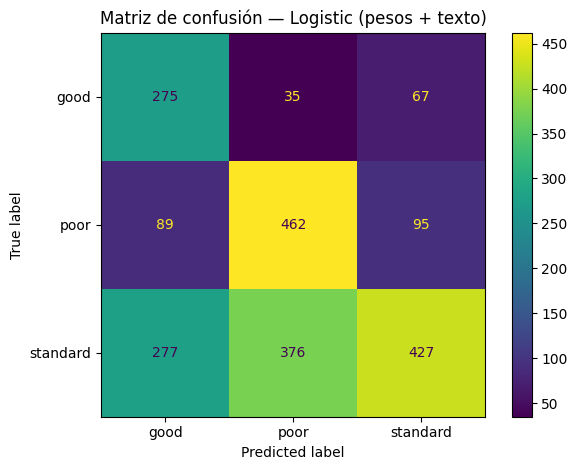

In [75]:
def only_weights(X: pd.DataFrame) -> pd.DataFrame:
    cols = [c for c in X.columns if re.search(r'(?i)(?:_peso|_pesos)$', c)]
    if 'Income_pesos' in X.columns: cols.append('Income_pesos')
    if 'Peso_edades'  in X.columns: cols.append('Peso_edades')
    Xw = X[sorted(set(cols))].apply(pd.to_numeric, errors='coerce').fillna(0)
    return Xw

Xw_tr = only_weights(x_train)
Xw_te = only_weights(x_test).reindex(columns=Xw_tr.columns, fill_value=0)


def texto_ohe_cols(X: pd.DataFrame) -> list[str]:

    return [c for c in X.columns if re.search(r'(?i)(?:_loan|_behaviour)$', c)]

text_cols = sorted(set(texto_ohe_cols(x_train)))  


Xtr_text_num = x_train[text_cols].apply(pd.to_numeric, errors='coerce').fillna(0) if text_cols else pd.DataFrame(index=x_train.index)
Xte_text_num = x_test.reindex(columns=text_cols, fill_value=0).apply(pd.to_numeric, errors='coerce').fillna(0) if text_cols else pd.DataFrame(index=x_test.index)

X_train_mix = pd.concat([Xw_tr, Xtr_text_num], axis=1)
X_test_mix  = pd.concat([Xw_te, Xte_text_num], axis=1)


num_cols = list(X_train_mix.columns)

extra_dummy_cols = [c for c in x_train.columns if c.lower().startswith('loan_')]
num_cols = list(dict.fromkeys(num_cols + [c for c in extra_dummy_cols if c in X_train_mix.columns]))


preproc = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
], remainder="drop")


log_pipe_mix = Pipeline([
    ("prep", preproc),
    ("clf", LogisticRegression(max_iter=2000, multi_class="multinomial", class_weight="balanced")),
])

log_pipe_mix.fit(X_train_mix, y_train)
y_pred = log_pipe_mix.predict(X_test_mix)


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de confusión — Logistic (pesos + texto)")
plt.tight_layout()
plt.show()
